In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv('data_flats2.csv', sep =';')
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

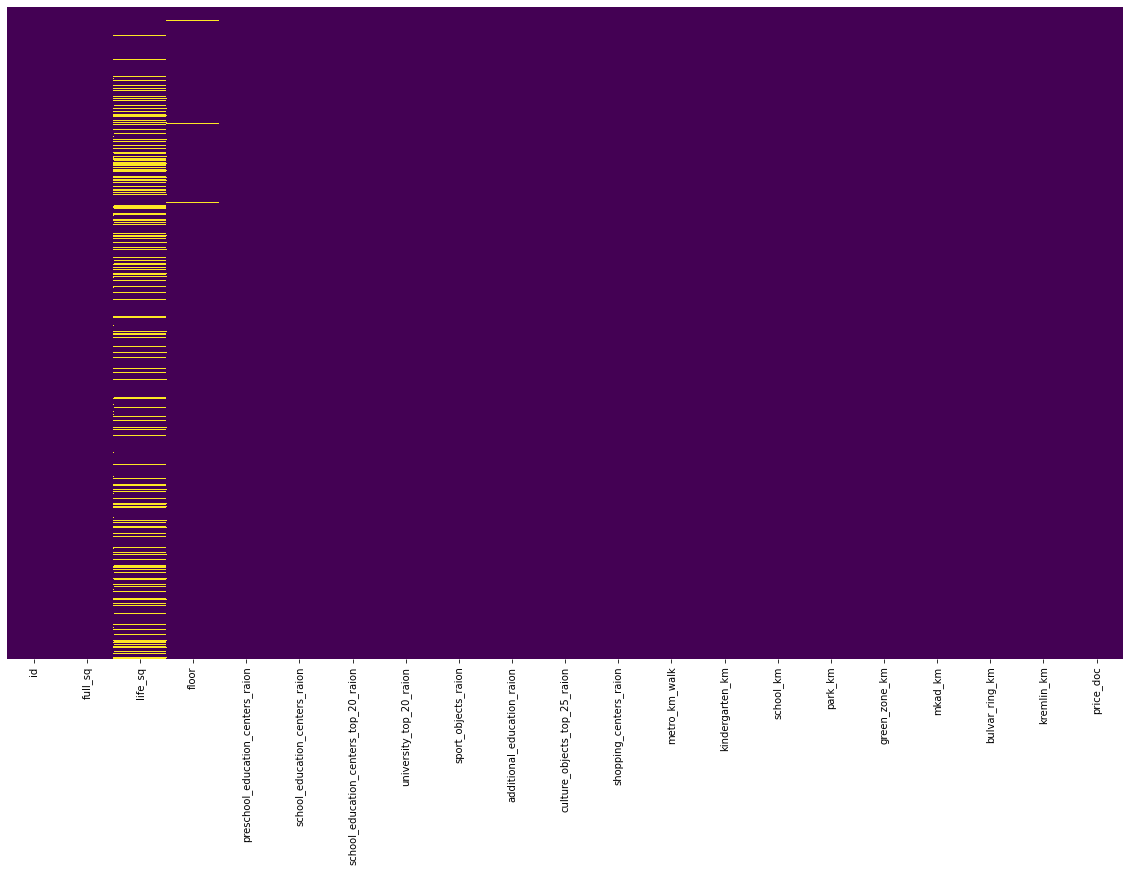

In [4]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')


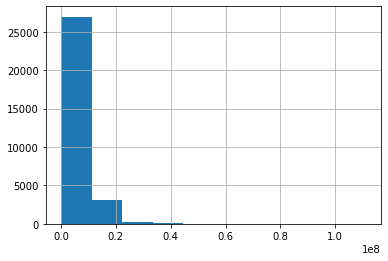

In [5]:
data.price_doc.hist();

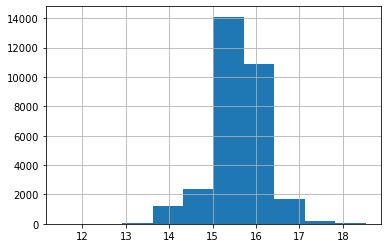

In [6]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();

<AxesSubplot:>

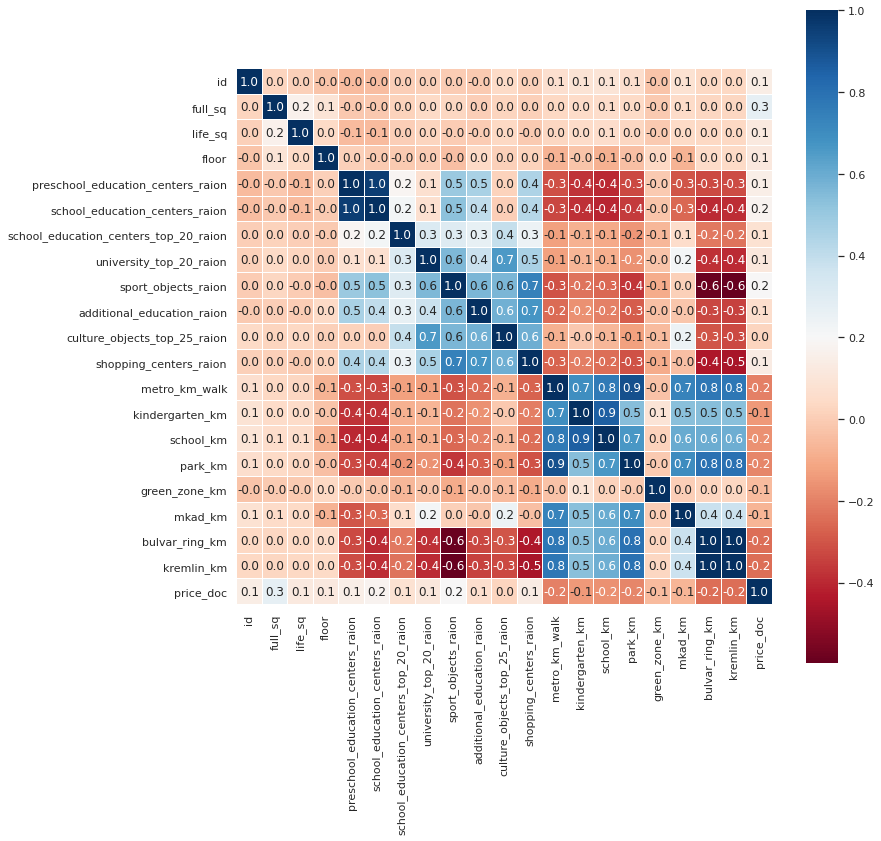

In [7]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [8]:
clean = data.drop(columns=['id', 'life_sq', 'preschool_education_centers_raion', 'kindergarten_km', 'park_km', 'kremlin_km'])
clean.dropna(inplace=True)

In [9]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30277 entries, 0 to 30468
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   full_sq                                30277 non-null  int64  
 1   floor                                  30277 non-null  float64
 2   school_education_centers_raion         30277 non-null  int64  
 3   school_education_centers_top_20_raion  30277 non-null  int64  
 4   university_top_20_raion                30277 non-null  int64  
 5   sport_objects_raion                    30277 non-null  int64  
 6   additional_education_raion             30277 non-null  int64  
 7   culture_objects_top_25_raion           30277 non-null  int64  
 8   shopping_centers_raion                 30277 non-null  int64  
 9   metro_km_walk                          30277 non-null  float64
 10  school_km                              30277 non-null  float64
 11  gr

In [10]:
X = clean.iloc[:,:-1].values
Y = clean.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=77)

In [33]:
# fit() у преобразователя данных применяется только на обучающей выборке (X_train):

transformer = RobustScaler().fit(X_train)
X_test = transformer.transform(X_test)
X_train = transformer.transform(X_train)

In [34]:
from sklearn.linear_model import LinearRegression
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(X_train_normed,Y_train) #обучаем модель на обучающих данных

LinearRegression()

In [35]:
y_pred = myModel.predict(X_test)

In [36]:
from sklearn import metrics  # подгружаем метрики

In [37]:
#Вычисляем MAE:
MAE = metrics.mean_absolute_error(Y_test, y_pred)
print(MAE)

#Вычисляем MSE:
MSE = metrics.mean_squared_error(np.exp(Y_test) - 1, np.exp(y_pred) - 1)
print(MSE)

#Вычисляем коэффициент детерминации:
R_2 = metrics.r2_score(Y_test, y_pred)
print(R_2)

0.35743785034607484
16818684371715.05
0.20307012094081323


# 3A.6. Линейная регрессия. Практика №1